In [2]:
%load_ext autoreload
%autoreload 2

import nest_asyncio

nest_asyncio.apply()

# Pesquisa no DuckDuckGo

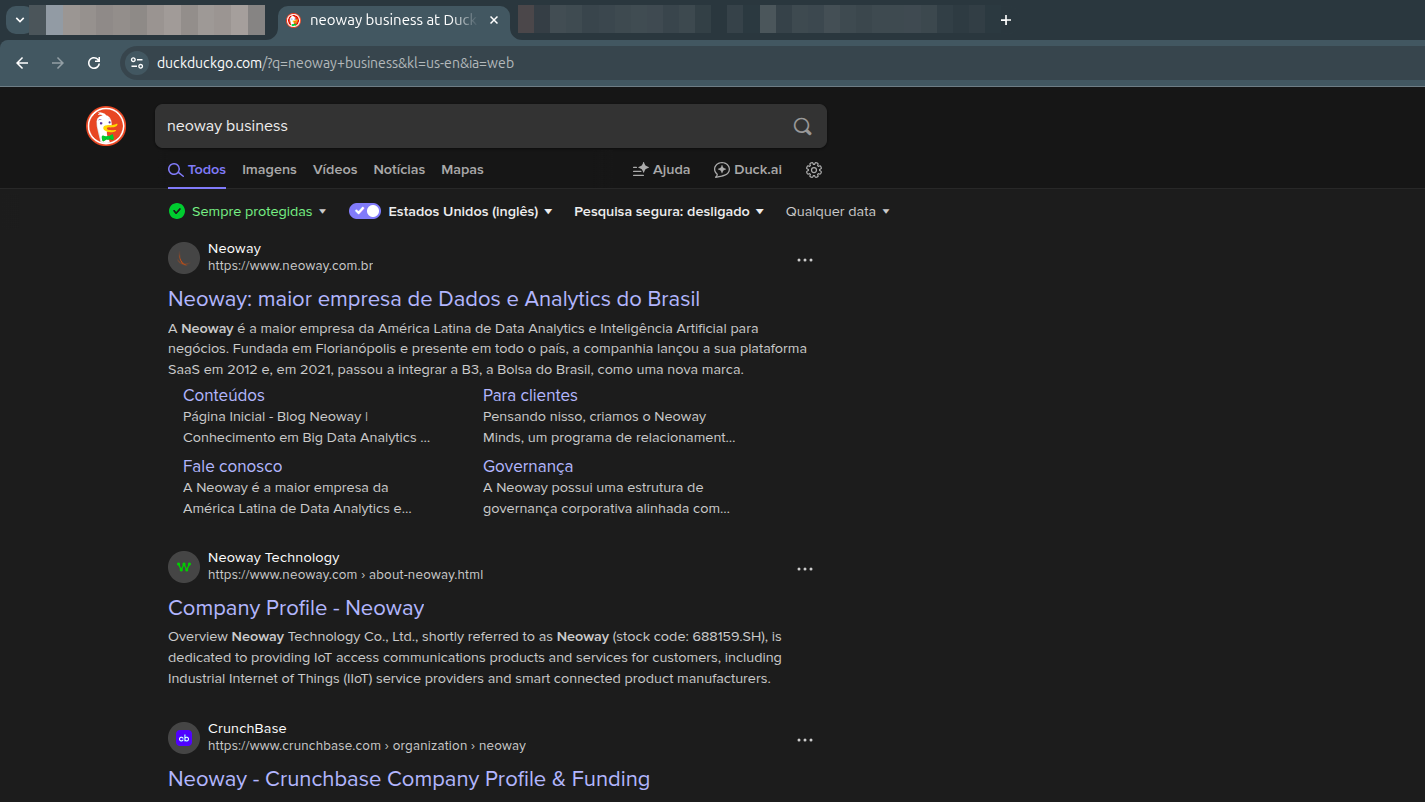

## E se acessar com o playwright?

In [3]:
from fake_useragent import UserAgent
from playwright.async_api import async_playwright

ua = UserAgent()


url = "https://duckduckgo.com/?q=neoway+business&kl=us-en&ia=web"

async with async_playwright() as playwright:
    browser = await playwright.firefox.launch(headless=True)
    context = await browser.new_context(user_agent=ua.random)
    page = await context.new_page()

    await page.goto(url, wait_until="networkidle", timeout=10000)

    html_content = await page.content()

In [4]:
from duckduckgo.clear_html import prettify_html
print(prettify_html(html_content[66500:70000]))

t:0;right:auto}.katex-display.fleqn&gt;.katex{padding-left:2em;text-align:left}body{counter-reset:katexEqnNo mmlEqnNo}
<body class="body--serp" data-activetabid="web">
  <input id="state_hidden" name="state_hidden" size="1" type="text"/>
  <!-- Ignore this input please -->
  <div id="spacing_hidden_wrapper">
    <div id="spacing_hidden">
    </div>
  </div>
  <div class="site-wrapper js-site-wrapper">
    <div class="welcome-wrap js-welcome-wrap">
    </div>
    <div class="header-wrap js-header-wrap ai-header-exp ready" data-testid="header" id="header_wrapper">
      <div class="header cw" id="header">
        <div class="header__shrink-beyond-min-size" id="header-non-nav">
          <div class="header__search-wrap">
            <a class="header__logo-wrap js-header-logo" data-testid="header-logo" href="/?kl=us%2Den" id="header-logo-wrapper" tabindex="-1">
              <span class="header__logo js-logo-ddg" data-dynamic-logo="">
                DuckDuckGo
              </span>
      

In [5]:
from IPython.display import HTML
from duckduckgo.clear_html import prettify_html, clear_html_for_llm

clean_html_results = await clear_html_for_llm(html_content)

HTML(clean_html_results["cleaned_html"])

## E para as notícias?

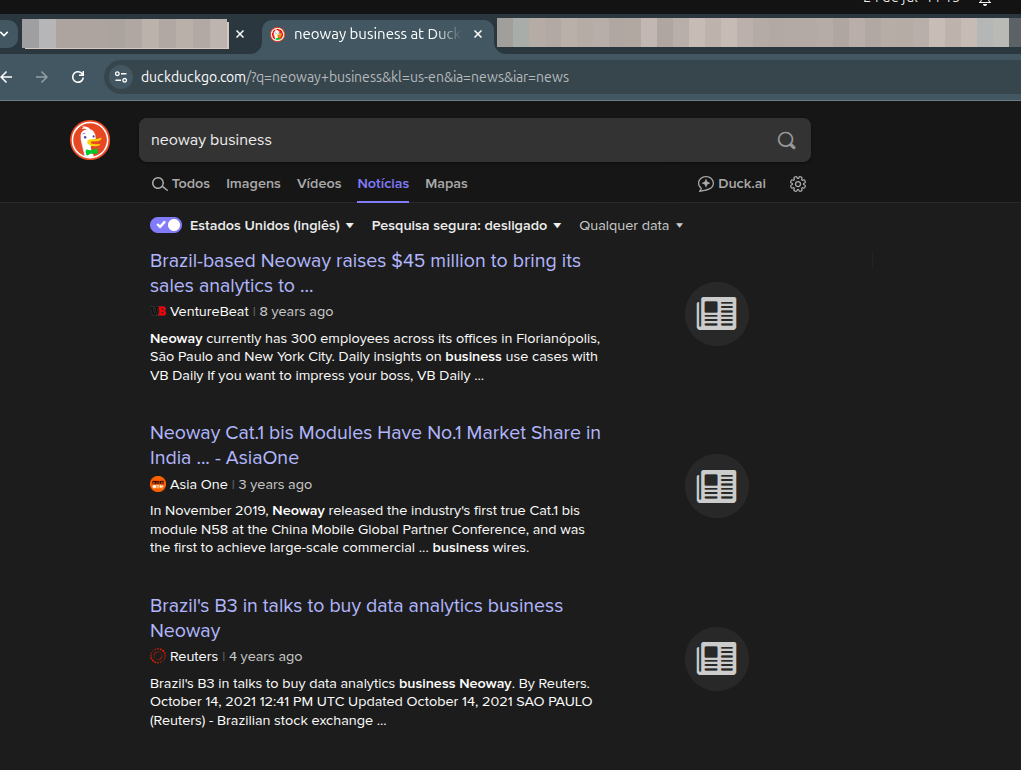

In [6]:
from fake_useragent import UserAgent
from playwright.async_api import async_playwright

ua = UserAgent()


url = "https://duckduckgo.com/?q=neoway+business&kl=us-en&ia=news&iar=news"

async with async_playwright() as playwright:
    browser = await playwright.firefox.launch(headless=True)
    context = await browser.new_context(user_agent=ua.random)
    page = await context.new_page()

    await page.goto(url, wait_until="networkidle", timeout=10000)

    html_content = await page.content()

In [7]:
from IPython.display import HTML
from duckduckgo.clear_html import prettify_html, clear_html_for_llm

clean_html_results = await clear_html_for_llm(html_content)

HTML(clean_html_results["cleaned_html"])

## Precisamos mudar as linguagens

In [8]:
from fake_useragent import UserAgent
from playwright.async_api import async_playwright

ua = UserAgent()


url = "https://duckduckgo.com/?q=neoway+business&iar=news&kl=br-pt"

async with async_playwright() as playwright:
    browser = await playwright.firefox.launch(headless=True)
    context = await browser.new_context(user_agent=ua.random)
    page = await context.new_page()

    await page.goto(url, wait_until="networkidle", timeout=10000)

    html_content = await page.content()

In [10]:
from IPython.display import HTML
from duckduckgo.clear_html import prettify_html
# HTML(html_content)

HTML(prettify_html(html_content))

# Criar um parser

In [11]:
from fake_useragent import UserAgent
from playwright.async_api import async_playwright

ua = UserAgent()


url = "https://duckduckgo.com/?q=neoway+business&kl=us-en&ia=web"

async with async_playwright() as playwright:
    browser = await playwright.firefox.launch(headless=True)
    context = await browser.new_context(user_agent=ua.random)
    page = await context.new_page()

    await page.goto(url, wait_until="networkidle", timeout=10000)

    html_content = await page.content()

In [12]:
from duckduckgo.clear_html import clear_html_for_llm

clean_html = (await clear_html_for_llm(html_content))["cleaned_html"]

# print(clean_html)

In [13]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(clean_html, "html.parser")

In [14]:
articles = soup.find_all("article")

In [15]:
article = articles[0]
article

<article data-handled-by-react="true" data-nrn="result" data-testid="result" id="r1-0"><div><button type="button"></button><div><p>neoway.com.br</p><div><a href="?q=neoway%20business%20site%3Awww.neoway.com.br"><span>Only include results for this site</span></a><a href="?q=neoway%20business%20-site%3Awww.neoway.com.br"><span>Hide site from these results</span></a><div></div><div><span>Share feedback about this site</span></div></div></div></div><div><div><span><a data-handled-by-react="true" data-testid="result-extras-site-search-link" href="/?q=neoway%20business+site:www.neoway.com.br&amp;kl=us-en" title="Search domain neoway.com.br"><div><img src="//external-content.duckduckgo.com/ip3/www.neoway.com.br.ico"/></div></a></span><div><p>Neoway</p><a data-handled-by-react="true" data-testid="result-extras-url-link" href="https://www.neoway.com.br/"><div><p><span>https://www.neoway.com.br</span></p></div></a></div></div></div><div><h2><a data-handled-by-react="true" data-testid="result-tit

#### Os links estão das tags `<a data-testid="result-extras-url-link>`

In [16]:
links = article.find_all("a", {"data-testid": "result-extras-url-link"})
links = [link.find("div").text for link in links]
links

['https://www.neoway.com.br']

#### Os títulos estão nas tags `<a data-testid="result-title-a>`

In [17]:
titles= article.find_all("a", {"data-testid": "result-title-a"})
titles = [title.find("span").text for title in titles]
titles

['Neoway: maior empresa de Dados e Analytics do Brasil']

#### Os títulos estão nas tags `<a data-testid="snippet>`

In [18]:
snippets = article.find_all("div", {"data-result": "snippet"})
snippets = [snippet.find("span").text for snippet in snippets]
snippets

['A Neoway é a maior empresa da América Latina de Data Analytics e Inteligência Artificial para negócios. Fundada em Florianópolis e presente em todo o país, a companhia lançou a sua plataforma SaaS em 2012 e, em 2021, passou a integrar a B3, a Bolsa do Brasil, como uma nova marca.']

#### A source precisa de uma lógica mais apurada pois nao tem nem um seletor

In [19]:
source = [
    p.text
    for d1 in article.find_all("div")
    for d2 in d1.find_all("div")
    for d3 in d2.find_all("div")
    for p in d3.find_all("p")
    if not len(p.find_all("span"))
]

source

['Neoway']

# Exemplo

In [1]:
import duckduckgo


await duckduckgo.search("danone", search_type="web", use_proxy=False)

2025-07-24 14:57:46.525 | INFO     | duckduckgo:process_search_type:64 - Generated url: 'https://duckduckgo.com/?q=danone&kl=br-pt&kaf=1&k1=-1&ia=web&t=h_'
2025-07-24 14:57:50.483 | INFO     | duckduckgo.browser:navigate_with_retry:165 - Tentativa 1/3 com 'networkidle' (timeout: 60000ms)


[SearchResult(search_type='web', link='https://corporate.danone.com.br', title='Início | Danone Brasil', snippet='Conheça as linhas de produtos da Danone Brasil, que oferece alimentos saudáveis e sustentáveis para o bem-estar de todas as pessoas. Saiba mais sobre a missão, a história, a inovação e a sustentabilidade da empresa.', source='Danone Brasil', relative_time=None),
 SearchResult(search_type='web', link='https://www.mundodanone.com.br', title='Nutrição e Saúde para todas as idades | Mundo Danone', snippet='Encontre em Mundo Danone nutrição e saúde para todas as idades. Acesse e ganhe 10% de desconto na sua primeira compra, venha conferir e aproveite!', source='Mundo Danone', relative_time=None),
 SearchResult(search_type='web', link='https://www.danone.com', title='Danone: World food company | Danone Group', snippet='Danone is a global leader in healthy food and drinks, with products ranging from yogurts and plant-based products to waters and specialized nutrition. Learn about 

In [1]:
import duckduckgo


await duckduckgo.search("danone", search_type="news", use_proxy=False)

2025-07-24 15:00:25.879 | INFO     | duckduckgo:process_search_type:64 - Generated url: 'https://duckduckgo.com/?q=danone&kl=br-pt&kaf=1&k1=-1&iar=news&ia=news'
2025-07-24 15:00:29.868 | INFO     | duckduckgo.browser:navigate_with_retry:165 - Tentativa 1/3 com 'networkidle' (timeout: 60000ms)


[SearchResult(search_type='news', link='https://www.bocalista.com/pt-actimel-danone-amostras-gratis/', title='Actimel Danone: Como participar de promoções com amostras grátis para degustação', snippet='Se você gosta de experimentar novas bebidas saudáveis sem precisar pagar antes, as promoções são a melhor forma de começar.', source='Bocalista', relative_time='1 hour ago'),
 SearchResult(search_type='news', link='https://exame.com/esg/a-estrategia-de-inovacao-da-danone-para-combinar-tradicao-centenaria-com-inteligencia-artificial/', title='Como a Danone quer combinar tradição centenária com inovação e inteligência artificial', snippet='Isabeller Esser, diretora-executiva de recursos humanos, pesquisa e inovação, qualidade e segurança dos alimentos da companhia, contou à EXAME sobre os próximos passos da gigante alimentícia', source='Exame', relative_time='5 hours ago'),
 SearchResult(search_type='news', link='https://www.bocalista.com/pt-amostras-gratis-deaptamil-danone/', title='Aptam

In [2]:
red_flags_termos = [
    # Compliance e Ética
    "corrupção",
    "suborno",
    "propina",
    "lavagem de dinheiro",
    "fraude",
    "esquema",
    "superfaturamento",
    "cartel",
    "formação de cartel",
    "conluio",
    
    # Questões Trabalhistas
    "trabalho escravo",
    "trabalho infantil",
    "assédio moral",
    "assédio sexual",
    "discriminação",
    "condições degradantes",
    "exploração trabalhista",
    "terceirização ilegal",
    "trabalho análogo à escravidão",
    "violação trabalhista",
    
    # Questões Financeiras
    "sonegação",
    "evasão fiscal",
    "inadimplência",
    "calote",
    "falência",
    "recuperação judicial",
    "dívidas trabalhistas",
    "multa tributária",
    "autuação fiscal",
    "irregularidade contábil",
    
    # Questões Ambientais
    "crime ambiental",
    "poluição",
    "desmatamento",
    "vazamento tóxico",
    "contaminação",
    "licença ambiental cassada",
    "multa ambiental",
    "destruição ambiental",
    
    # Questões Jurídicas e Regulatórias
    "investigação",
    "operação policial",
    "busca e apreensão",
    "indiciamento",
    "processo criminal",
    "condenação",
    "embargo",
    "interdição",
    "cassação de licença",
    "penalidade regulatória",
    "sanção administrativa"
]



In [9]:
import asyncio
import duckduckgo

company = "danone"
search_type = "web"
use_proxy=True

QTE_TERMS = 50

async def _find_redflag(company, red_flag, *args, **kwargs):
    return await duckduckgo.search(f'"{company}" "{red_flag}"', *args, **kwargs)

medias_results = await asyncio.gather(
    *[_find_redflag(company, red_flag, search_type=search_type, use_proxy=use_proxy) for red_flag in red_flags_termos[:QTE_TERMS]]
)

results = []
for media in medias_results:
    results.extend(media)

print(len(results))

2025-07-24 15:22:34.591 | INFO     | duckduckgo:process_search_type:64 - Generated url: 'https://duckduckgo.com/?q=%22danone%22+%22corrup%C3%A7%C3%A3o%22&kl=br-pt&kaf=1&k1=-1&ia=web&t=h_'
2025-07-24 15:22:34.593 | INFO     | duckduckgo:process_search_type:64 - Generated url: 'https://duckduckgo.com/?q=%22danone%22+%22suborno%22&kl=br-pt&kaf=1&k1=-1&ia=web&t=h_'
2025-07-24 15:22:34.593 | INFO     | duckduckgo:process_search_type:64 - Generated url: 'https://duckduckgo.com/?q=%22danone%22+%22propina%22&kl=br-pt&kaf=1&k1=-1&ia=web&t=h_'
2025-07-24 15:22:34.594 | INFO     | duckduckgo:process_search_type:64 - Generated url: 'https://duckduckgo.com/?q=%22danone%22+%22lavagem+de+dinheiro%22&kl=br-pt&kaf=1&k1=-1&ia=web&t=h_'
2025-07-24 15:22:34.595 | INFO     | duckduckgo:process_search_type:64 - Generated url: 'https://duckduckgo.com/?q=%22danone%22+%22fraude%22&kl=br-pt&kaf=1&k1=-1&ia=web&t=h_'
2025-07-24 15:22:34.595 | INFO     | duckduckgo:process_search_type:64 - Generated url: 'https://

Error: Page.goto: NS_ERROR_PROXY_CONNECTION_REFUSED
Call log:
  - navigating to "https://duckduckgo.com/?q=%22danone%22+%22destrui%C3%A7%C3%A3o+ambiental%22&kl=br-pt&kaf=1&k1=-1&ia=web&t=h_", waiting until "networkidle"


2025-07-24 15:23:11.046 | INFO     | duckduckgo.browser:navigate_with_retry:165 - Tentativa 1/3 com 'networkidle' (timeout: 60000ms)
2025-07-24 15:23:11.591 | INFO     | duckduckgo.browser:navigate_with_retry:165 - Tentativa 1/3 com 'networkidle' (timeout: 60000ms)
2025-07-24 15:23:11.615 | INFO     | duckduckgo.browser:navigate_with_retry:165 - Tentativa 1/3 com 'networkidle' (timeout: 60000ms)
2025-07-24 15:23:11.638 | INFO     | duckduckgo.browser:navigate_with_retry:165 - Tentativa 1/3 com 'networkidle' (timeout: 60000ms)
2025-07-24 15:23:11.662 | INFO     | duckduckgo.browser:navigate_with_retry:165 - Tentativa 1/3 com 'networkidle' (timeout: 60000ms)
2025-07-24 15:23:11.721 | INFO     | duckduckgo.browser:navigate_with_retry:165 - Tentativa 1/3 com 'networkidle' (timeout: 60000ms)
2025-07-24 15:23:11.836 | INFO     | duckduckgo.browser:navigate_with_retry:165 - Tentativa 1/3 com 'networkidle' (timeout: 60000ms)
2025-07-24 15:23:11.861 | INFO     | duckduckgo.browser:navigate_with

In [10]:
results

[SearchResult(search_type='web', link='https://exame.com/negocios/filial-da-danone-na-china-e-acusada-de-corrupcao-de-medicos/', title='Filial da Danone na China é acusada de corrupção de médicos', snippet='10 de may de 2025Pequim - A filial chinesa da Danone, Nutricia, foi acusada nesta quarta-feira de corrupção por um jornal da China, país que investiga empresas farmacêuticas e de laticínios.', source='Exame', relative_time=None),
 SearchResult(search_type='web', link='https://corporate.danone.com.br/fale-conosco', title='Fale Conosco | Danone Brasil', snippet='Caso tenha conhecimento sobre algum tipo de corrupção, suborno, fraude, irregularidade ou violação de direitos humanos (como: racismo, trabalho ilegal, trabalho escravo, infantil, discriminação de gênero ou orientação sexual, discriminação de pessoas com deficiência, assédio moral ou sexual) que envolva a Danone ou seus parceiros ...', source='Danone Brasil', relative_time=None),
 SearchResult(search_type='web', link='https://